In [1]:
"""
Visualizing lava flow
Author: Zhongan Lin
"""
%matplotlib notebook 
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Grid & advection/diffusion parameters
Ngrid = 50
Nsteps = 5000
dt = 1
dx = 1

v = -0.1
alpha = v*dt/2/dx
D1 = 0.1
D2 = 1
beta1 = D1*dt / (dx**2)
beta2 = D2*dt / (dx**2)

x = np.arange(Ngrid) * dx

# Initial condition
f1 = np.copy(x)*1./Ngrid
f2 = np.copy(x)*1./Ngrid

<IPython.core.display.Javascript object>


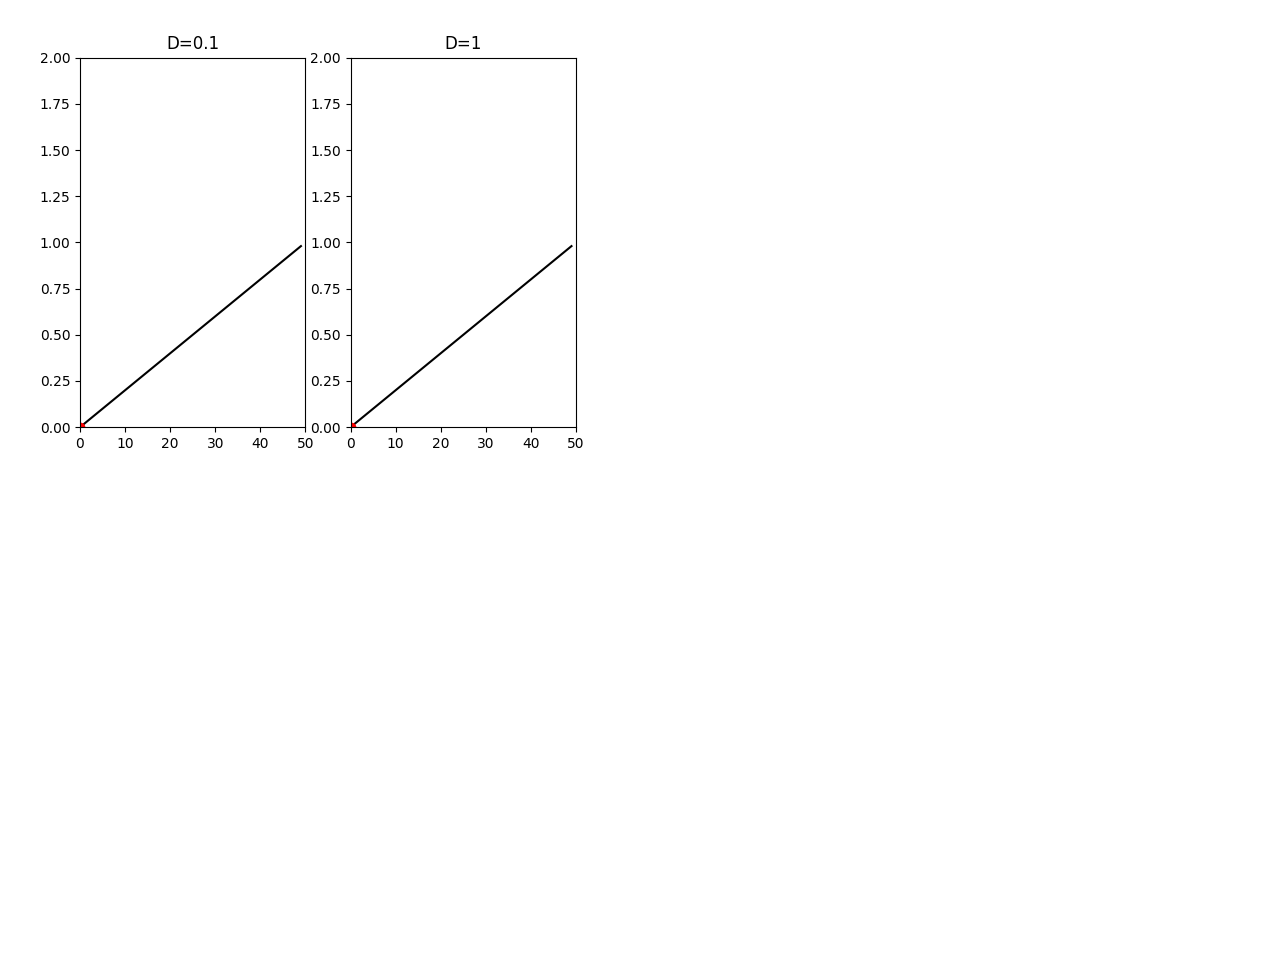

In [ ]:
# Plot setup
plt.ion()
fig, axes = plt.subplots(1,2)
axes[0].set_title("D={}".format(D1))
axes[1].set_title("D={}".format(D2))

# Initial state in the background
axes[0].plot(x, f1, 'k-')
axes[1].plot(x, f2, 'k-')

# Plot objects to be updated
plt1, = axes[0].plot(x, f1, 'ro')
plt2, = axes[1].plot(x, f2, 'ro')

for ax in axes:
    ax.set_xlim([0, Ngrid])
    ax.set_ylim([0,2])

fig.canvas.draw()

count = 0

# Evolution
while count < Nsteps:
     
    # Diffusion --------------
    # Diffusion operation matrices
    A1 = np.eye(Ngrid)*(1+2*beta1) + np.eye(Ngrid,k=1)*(-beta1) + \
        np.eye(Ngrid,k=-1)*(-beta1)
    A2 = np.eye(Ngrid)*(1+2*beta2) + np.eye(Ngrid,k=1)*(-beta2) + \
        np.eye(Ngrid,k=-1)*(-beta2)
    
    # Boundary conditions
    A1[Ngrid-1, Ngrid-1] = 1
    A2[Ngrid-1, Ngrid-1] = 1
    A1[0,0] = 1
    A2[0,0] = 1
    A1[0,1] = 0
    A2[0,1] = 0
    
    # Advection --------------
    # LF
    f1[1:Ngrid-1] = 0.5*(f1[2:] + f1[:Ngrid-2]) - alpha*(f1[2:] - f1[:Ngrid-2])
    f2[1:Ngrid-1] = 0.5*(f2[2:] + f2[:Ngrid-2]) - alpha*(f2[2:] - f2[:Ngrid-2])
    
    # Solve for next time step
    f1 = np.linalg.solve(A1, f2)
    f2 = np.linalg.solve(A2, f2)
    
    # Update plot
    plt1.set_ydata(f1)
    plt2.set_ydata(f2)
    
    fig.canvas.draw()
    plt.pause(0.001)
    count += 1